# Titanic Machine Learning

## Objective

To find the best model for predicting the survival chances of a person on various factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [2]:
warnings.filterwarnings("ignore")

## DataSet

In [3]:
df_train=pd.read_csv("../input/titanic/train.csv")

In [4]:
df_test=pd.read_csv("../input/titanic/test.csv")
df_tresult=pd.read_csv("../input/titanic/gender_submission.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.shape

(891, 12)

In [7]:
df_train[df_train.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
lst=["PassengerId","Name","Ticket","Cabin"]
for col in lst:
    df_train.drop(col,axis=1,inplace=True)

In [10]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df_train.dropna(inplace=True,subset=["Embarked"])

In [12]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [13]:
df_train[df_train.Survived==1].columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [14]:
df_train.Age=round(df_train.Age)
df_train.Fare=round(df_train.Fare)

## Description

In [15]:
df=pd.DataFrame([df_train[df_train.Survived==0].mean().values,df_train[df_train.Survived==1].mean().values],columns=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,2.531876,30.615566,0.553734,0.329690,22.136612
1,1.0,1.955882,28.194444,0.476471,0.467647,48.205882


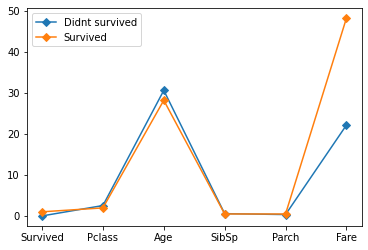

In [16]:
plt.plot(df.columns,df.iloc[0,:].values,label="Didnt survived",marker="D")
plt.plot(df.columns,df.iloc[1,:].values,label="Survived",marker="D")
plt.legend()

In [17]:
mm=df_train.Age[df_train.Sex=="male"].mean()
fm=df_train.Age[df_train.Sex=="female"].mean()
df_train[df_train.Sex=="male"].fillna(value=mm,inplace=True)
df_train[df_train.Sex=="female"].fillna(value=fm,inplace=True)

In [18]:
df_train.Age.fillna(df_train.Age[df_train.Sex=="male"].mean(),inplace=True)

In [19]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

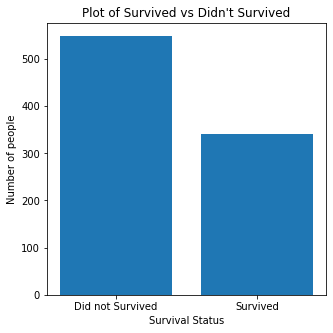

In [20]:
s=[len(df_train.Survived[df_train.Survived==0]),len(df_train.Survived[df_train.Survived==1])]
plt.figure(figsize=(5,5))
plt.xlabel("Survival Status")
plt.ylabel("Number of people")
plt.title("Plot of Survived vs Didn't Survived")
plt.bar(["Did not Survived","Survived"],s)
plt.show()

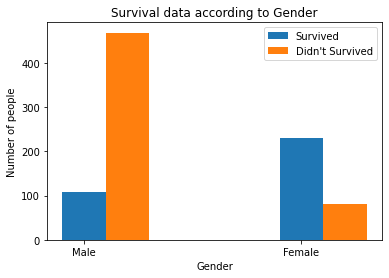

In [21]:
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.title("Survival data according to Gender")
Gender=["Male","Female"]
xpos=np.arange(len(Gender))
plt.xticks(xpos,Gender)
sd=[len(df_train[df_train.Survived==1][df_train.Sex=="male"]),len(df_train[df_train.Survived==1][df_train.Sex=="female"])]
ds=[len(df_train[df_train.Survived==0][df_train.Sex=="male"]),len(df_train[df_train.Survived==0][df_train.Sex=="female"])]
plt.bar(xpos,sd,label="Survived",width=0.2)
plt.bar(xpos+0.2,ds,label="Didn't Survived",width=0.2)
plt.legend()
plt.show()

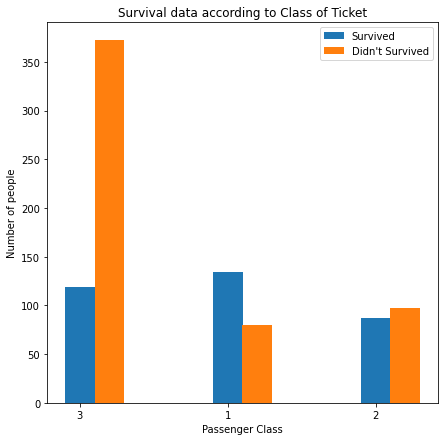

In [22]:
plt.figure(figsize=(7,7))
plt.xlabel("Passenger Class")
plt.ylabel("Number of people")
plt.title("Survival data according to Class of Ticket")
Pclass=df_train.Pclass.unique()
xpos=np.arange(len(Pclass))
plt.xticks(xpos,Pclass)
pccd=[len(df_train[df_train.Survived==0][df_train.Pclass==i]) for i in Pclass]
pccs=[len(df_train[df_train.Survived==1][df_train.Pclass==i]) for i in Pclass]
plt.bar(xpos,pccs,label="Survived",width=0.2)
plt.bar(xpos+0.2,pccd,label="Didn't Survived",width=0.2)
plt.legend()
plt.show()

<BarContainer object of 889 artists>

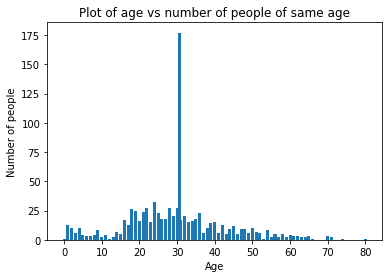

In [23]:
ages=df_train.Age
ages=df_train.Age
agel=[]
for i in df_train.Age.values:
    agel.append(len(df_train[df_train.Age==i]))
plt.title("Plot of age vs number of people of same age")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.bar(ages,agel)

## Training under different models

In [24]:
X=df_train.drop("Survived",axis=1)
y=df_train.Survived

In [25]:
le=LabelEncoder()
X.Sex=le.fit_transform(X.Sex)
X.Embarked=le.fit_transform(X.Embarked)

In [26]:
sspc=pd.DataFrame(X.iloc[:,3],columns=['SibSp'])
ct2=ColumnTransformer([('SibSp',OneHotEncoder(),[0])],remainder="passthrough")
ssp=pd.DataFrame(ct2.fit_transform(sspc).todense())

In [27]:
parc=pd.DataFrame(X.iloc[:,4],columns=['Parch'])
ct3=ColumnTransformer([('Parch',OneHotEncoder(),[0])],remainder="passthrough")
par=pd.DataFrame(ct2.fit_transform(sspc).todense())

In [28]:
emkc=pd.DataFrame(X.iloc[:,6],columns=['Embarked'])
ct4=ColumnTransformer([('Embarked',OneHotEncoder(),[0])],remainder="passthrough")
emk=pd.DataFrame(ct4.fit_transform(emkc))

In [29]:
X.drop("SibSp",axis=1,inplace=True)
X.drop("Parch",axis=1,inplace=True)
X.drop("Embarked",axis=1,inplace=True)

In [30]:
ct1=ColumnTransformer([('Pclass',OneHotEncoder(),[0])],remainder="passthrough")
pcs=ct1.fit_transform(X)
X=pd.DataFrame(pcs)
X=pd.concat([X,ssp,par,emk],axis=1)

In [31]:
X.columns=range(len(X.columns))

In [32]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,1.0,1.0,22.0,7.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,38.0,71.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,26.0,8.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,35.0,53.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,35.0,8.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train test Split


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

### Linera Regression

In [34]:
lm=LinearRegression()

In [35]:
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.3823115072956681

### Logistic Regression

In [36]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8033707865168539

### SVM

In [37]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.6348314606741573

In [38]:
svm2=SVC(gamma='auto')
svm2.fit(X_train,y_train)
svm2.score(X_test,y_test)

0.651685393258427

### RandomForestClassifier

In [39]:
rfc=RandomForestClassifier(n_estimators=15)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.7808988764044944

### K-Fold Cross Validation

In [40]:
cvs_list=[lr,lm,rfc,svm,svm2]
csv_name=['lr','lm','km','rfc','svm','svm2','gnb','mnb','bnb']

In [41]:
acc={}
for k in range(len(cvs_list)):
    acc[csv_name[k]]=cross_val_score(cvs_list[k],X,y,cv=3).mean()

In [42]:
acc

{'lr': 0.8031516364849698,
 'lm': 0.36943358210782834,
 'km': 0.7851677435010768,
 'rfc': 0.653577820244487,
 'svm': 0.6851017684351017}

In [43]:
acc_v=list(acc.values())
acc_m=max(acc_v)
ind=acc_v.index(acc_m)
acc

{'lr': 0.8031516364849698,
 'lm': 0.36943358210782834,
 'km': 0.7851677435010768,
 'rfc': 0.653577820244487,
 'svm': 0.6851017684351017}

# GridSearchCV

In [44]:
clf=GridSearchCV(lr,param_grid={},cv=5, return_train_score=False)

In [45]:
clf.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(), param_grid={})

In [46]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059001,0.00138,0.003452,0.000137,{},0.808989,0.814607,0.803371,0.797753,0.813559,0.807656,0.006346,1


In [47]:
clf.best_score_

0.8076556846314988

### RandomSearchCV

In [48]:
rs=RandomizedSearchCV(lr,param_distributions={},cv=5,return_train_score=False,n_iter=2)

In [49]:
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=2,
                   param_distributions={})

In [50]:
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.05491,0.00143,0.003374,0.000125,{},0.839161,0.774648,0.823944,0.802817,0.760563,0.800227,0.029368,1


In [51]:
rs.best_score_

0.8002265340293508

### Testing

In [52]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
lst=["PassengerId","Name","Ticket","Cabin"]
for col in lst:
    df_test.drop(col,axis=1,inplace=True)

In [55]:
df_test.Age.fillna(df_test.Age[df_test.Sex=='male'].mean(),inplace=True)

In [56]:
df_test.Fare.fillna(0,inplace=True)

In [57]:
df_test.Age=round(df_test.Age)
df_test.Fare=round(df_test.Fare)

In [58]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [59]:
for col in df_test.columns:
    print(col,df_test[col].unique())

Pclass [3 2 1]
Sex ['male' 'female']
Age [34. 47. 62. 27. 22. 14. 30. 26. 18. 21. 46. 23. 63. 24. 35. 45. 55.  9.
 48. 50. 41. 33. 25. 39. 60. 36. 20. 28. 10. 17. 32. 13. 31. 29.  6. 67.
 49.  2. 76. 43. 16.  1. 12. 42. 53. 40. 61.  7. 15. 54. 64. 37.  8.  0.
 38. 57. 19. 58. 59. 44.  5. 51.  3.]
SibSp [0 1 2 3 4 5 8]
Parch [0 1 3 2 4 6 5 9]
Fare [  8.   7.  10.   9.  12.  29.  24.  26.  82.  61.  28.  59.   3.  32.
 262.  14.  62.  30.  22.  21.  23.  58.  56.  13.  27.  53.  76.  16.
  60.  15. 263.  42. 212. 222.  11.  52.  79.  55.   6.  17.  75.  25.
  47. 152.  18.  83.   0.  31.  50.  34.  39.  37. 248.  70. 134. 228.
  74. 165.  65.  71. 106. 137.  20.  40.  46.  94. 136. 147. 211. 512.
  63.  51.  90. 109.]
Embarked ['Q' 'S' 'C']


In [60]:
df_test.Sex=le.fit_transform(df_test.Sex)
df_test.Embarked=le.fit_transform(df_test.Embarked)

In [61]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.0,0,0,8.0,1
1,3,0,47.0,1,0,7.0,2
2,2,1,62.0,0,0,10.0,1
3,3,1,27.0,0,0,9.0,2
4,3,0,22.0,1,1,12.0,2
...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0,2
414,1,0,39.0,0,0,109.0,0
415,3,1,38.0,0,0,7.0,2
416,3,1,30.0,0,0,8.0,2


In [62]:
sspc=pd.DataFrame(df_test.iloc[:,3],columns=['SibSp'])
ct2=ColumnTransformer([('SibSp',OneHotEncoder(),[0])],remainder="passthrough")
ssp=pd.DataFrame(ct2.fit_transform(sspc).todense())

In [63]:
parc=pd.DataFrame(df_test.iloc[:,4],columns=['Parch'])
ct3=ColumnTransformer([('Parch',OneHotEncoder(),[0])],remainder="passthrough")
par=pd.DataFrame(ct3.fit_transform(sspc).todense())

In [64]:
emkc=pd.DataFrame(df_test.iloc[:,6],columns=['Embarked'])
ct4=ColumnTransformer([('Embarked',OneHotEncoder(),[0])],remainder="passthrough")
emk=pd.DataFrame(ct4.fit_transform(emkc))

In [65]:
df_test.drop("SibSp",axis=1,inplace=True)
df_test.drop("Parch",axis=1,inplace=True)
df_test.drop("Embarked",axis=1,inplace=True)
df_test=pd.concat([df_test,ssp,par,emk],axis=1)

In [66]:
ct1=ColumnTransformer([('Pclass',OneHotEncoder(),[0])],remainder="passthrough")
pcs=ct1.fit_transform(df_test)
df_test=pd.DataFrame(pcs)

In [67]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,1.0,1.0,34.0,8.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,47.0,7.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,62.0,10.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,27.0,9.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,22.0,12.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,1.0,30.0,8.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,1.0,0.0,0.0,0.0,39.0,109.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,0.0,0.0,1.0,1.0,38.0,7.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.0,0.0,1.0,1.0,30.0,8.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
df_test=pd.DataFrame(df_test)

### Test Results

In [69]:
clf.predict(df_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [70]:
clf.score(df_test,df_tresult.Survived)

0.9401913875598086

## Conclusion

The LinearRegression Model produces highest accuary of 80.99 %.

The Model predicted the test result about 94.019 %.